In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [137]:
Z0=6.39 #profundidad del eje del túnel (m)
D=4.93 #ancho del túnel (m)
R=D/2
t=0.15 #espesor del revestimiento (m)
H=6.78 #altura del túnel

In [135]:
gamma_s=19 #peso específico del suelo (kN/m3)
phi=30 #angulo de fricción interna (°)
c=15 #cohesion (kPa)
psi=1 #coeficiente de fractura de la corona plastificada (1=fragil, 0:ductil)
nus=0.3 #coeficiente de Poisson del suelo (-)
Es=5e4 #módulo de elasticidad del suelo (kPa)
K0=0.6

In [128]:
fc=30 #resistencia a la compresión simple del hormigón (MPa)
Ec=4600*np.sqrt(fc)*1000 #módulo de elasticidad del hormigón (kPa)
nuc=0.16

(1) Curva desplazamiento-presion del suelo

En primer lugar calculamos el estado inicial de esfuerzos en la masa de suelo

In [3]:
sigma_0=gamma_s*Z0 #tensiones iniciales en el eje del túnel (kN/m2)
print('sigma_0=',sigma_0,'kN')

sigma_0= 121.41 kN


Ecuaciones que definen la curva de convergencia del suelo. Las escribo en forma de función.

In [112]:
phi_rad=np.deg2rad(phi)

pal=sigma_0*(1-np.sin(phi_rad))-c*np.cos(phi_rad) #tension limite de plastificación (kPa)

def ue(pa):
    #ecuación de desplazamiento en la clave en regimen elástico del suelo (m)
    return (gamma_s*Z0-pa)*(1+nus)*D/(2*Es) 

uel=ue(pal) #desplazamiento de la clave en el límite de plastificación (m)


def Rp(pa):
    #radio de plastificación (m)
    pot=(1-np.sin(phi_rad))/(2*np.sin(phi_rad))
    return D/2*((1-np.sin(phi_rad))*(gamma_s*Z0+c/np.tan(phi_rad))/(pa+c/np.tan(phi_rad)))**pot #

def ca(pa):
    #coeficiente auxiliar para la ecuación en regimen plastico
    return (2*(1+nus))/Es*(gamma_s*Z0+c/np.tan(phi_rad))*np.sin(phi_rad)*(Rp(pa)/R)**2

def up(pa):
    #ecuación de desplazamiento en la clave en regimen plástico
    return R*(1-np.sqrt(1/(1+ca(pa))))

def pa(p):
    #presión corregida
    if p >= pal:
        return p
    else:
        return p+gamma_s*(Rp(p)-D/2)*psi
             
def us(p):
    #ecuación de desplazamiento en la clave completa
    if pa(p)>=pal:
        return ue(p)
    else:
        return up(p)

Ploteamos la curva del suelo. Sobre la linea punteada el suelo se encuentra en régimen elástico mientras que por debajo ya hay plastificación.

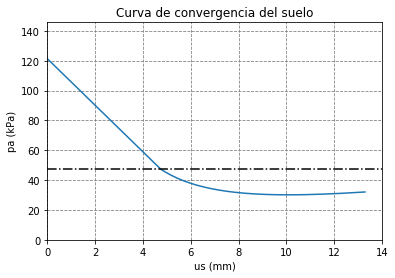

Tension de plastificacion= 47.71461894323342 kPa


In [121]:
p=np.linspace(0.0, 1000.0, num=1000)
N=p.size
u_s=np.zeros(N)
p_a=np.zeros(N)
for i in range(N):
    p_a[i]=pa(p[i])
    u_s[i]=us(p[i])

#plot y formato
plt.plot(u_s*1000,p_a) #curva
plt.plot([0, 15], [pal, pal], 'k-.')
axes = plt.gca()
axes.set_xlim([0,14])
axes.set_ylim([0,1.2*gamma_s*Z0])
plt.grid(color='grey', linestyle='--')
plt.xlabel('us (mm)')
plt.ylabel('pa (kPa)')
plt.title('Curva de convergencia del suelo')
plt.show()

print('Tension de plastificacion=',pal,'kPa')

In [141]:
k=Ec/(1+nuc)*(R**2-(R-t)**2)/((1-2*nuc)*R**2+(R-t)**2) #rigidez del sostenimiento

uc=gamma_s*Z0*((D+H)/2)**2/(4*t*Ec) #dezplazamiento por compresión uniforme

udmax=1/2*(1-K0)*gamma_s*Z0*(1+nus)*D/(2*k) #desplazamiento en clave (por diferencia entre presiones vert. y horiz.)

print(udmax)

4.742198541280842e-05
